In [1]:
data = [
    [1, 0, 10],
    [2, 9, 10],
    [3, 1, 2],
    [4, 1, 3],
    [5, 2, 4],
    [6, 2, 3],
    [7, 3, 10],
    [8, 4, 8],
    [9, 4, 9],
    [10, 5, 7],
    [11, 2, 6],
    [12, 5, 9],
    [13, 4, 7],
    [14, 6, 7],
    [15, 1, 7]
]

In [2]:
data1 = [
    [1, 6, 10],
    [2, 2, 3],
    [3, 0, 9],
    [4, 2, 7],
    [5, 4, 10],
    [6, 9, 10],
    [7, 4, 9],
    [8, 2, 4],
    [9, 1, 5],
    [10, 9, 10],
    [11, 5, 8],
    [12, 4, 7],
    [13, 6, 8],
    [14, 2, 5],
    [15, 3, 7]
]

In [3]:
data2 = [
    [1, 1, 5],
    [2, 0, 1],
    [3, 3, 7],
    [4, 4, 7],
    [5, 4, 10],
    [6, 5, 6],
    [7, 3, 10],
    [8, 2, 2],
    [9, 0, 6],
    [10, 3, 3],
    [11, 6, 6],
    [12, 6, 7],
    [13, 1, 3],
    [14, 7, 10],
    [15, 5, 6]
]

In [4]:
def last_end (data):
    data.sort(key=lambda x: x[2])  #сортируем по концу

    selected = []  #заявки
    last_end_time = float('-inf')  #конец последнего
    for event in data:
        n, start, end = event 
        if start >= last_end_time: #пересечение
            selected.append(n)  #добавляем
            last_end_time = end  #обновляем конец
    print("Выбранные заявки:", selected) 
    return selected

In [5]:
def last_start (data):
    data.sort(key=lambda x: x[1], reverse=True)  #сортируем по началу наоборот

    selected = []  #заявки
    last_start_time = float('inf')  #начало последнего

    for event in data:
        n, start, end = event 
        if end <= last_start_time:  #пересечение
            selected.append(n)  #добавляем
            last_start_time = start  #обновляем конец

    print("Выбранные заявки:", selected)
    return selected

In [8]:
selected = last_end(data1)
selected1 = last_start(data1)

Выбранные заявки: [2, 12, 6]
Выбранные заявки: [6, 13, 2]


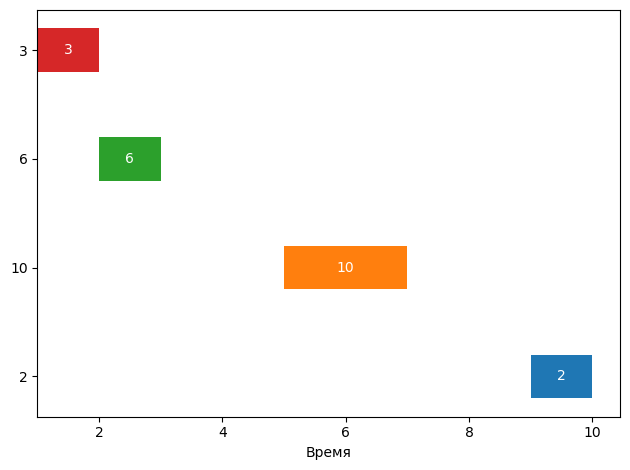

In [12]:
import matplotlib.pyplot as plt

filtered_data = [item for item in data if item[0] in selected]

fig, ax = plt.subplots()
for i, (number, start, end) in enumerate(filtered_data):
    ax.barh(i, end - start, left=start, height=0.4, align='center', label=str(number))
    ax.text(start + (end - start) / 2, i, str(number), va='center', ha='center', color='white')

ax.set_yticks(range(len(filtered_data)))
ax.set_yticklabels([str(item[0]) for item in filtered_data])
ax.set_xlabel('Время')

plt.tight_layout()
plt.show()

# Время простоя

In [31]:
def pr(selected):
    sorted_t = sorted(selected, key=lambda x: x[1])
    total = 0
    prev_end = sorted_t[0][2]  # Конец первой задачи

    # Проходим по всем задачам, начиная со второй
    for task in sorted_t[1:]:
        start, end = task[1], task[2]
        # Если есть разрыв между предыдущей задачей и текущей
        if start > prev_end:
            total += start - prev_end  # Добавляем время простоя
        prev_end = max(prev_end, end)  # Обновляем конец последней задачи

    return total


In [32]:
filtered_1 = [item for item in data if item[0] in selected]

pr(filtered_1)

4